# Comportamiento asintótico

Estamos interesados en conocer cómo es el vector $\pi^{(n)}$ para $n$ _grande_, y cómo está relacionada con $P^{(n)}$.

Si conocemos el vector de probabilidades inicial $\pi^{(0)}$ podemos simular el comportamiento. 

> __Pregunta:__ ¿Por qué es importante conocer el $\pi^{(n)}$ para $n$ _grande_?
* Ejemplo del tiempo
* Ejemplo de la pulga
* Ejemplo de los conductores
$$
\text{Precio del seguro}=f_d*C*\mathbb{P}(L)
$$
* Ejemplo de la ruina del apostador

## Ejemplo: el tiempo en mi ciudad

Tomemos el ejemplo {ref}`markov:4.1:ejemplo` donde la matriz de transición es:

$$
P
=\begin{pmatrix}\frac{3}{5}&\frac{2}{5}\\\frac{1}{5}&\frac{4}{5}\end{pmatrix}
$$

Si partimos de un día que llueve, es decir, $\pi^{(0)}=(1,0)$ entonces los sucesivos estados de la cadena son

$$
\pi^{(n)}=\pi^{(0)}\cdot P^n,\quad n=1,2,\ldots
$$

Sumas de filas:  [1. 1.]


,P(lluvia),P(sol)
0,1,0
1,0.6,0.4
2,0.44,0.56
3,0.376,0.624
4,0.3504,0.6496
5,0.34016,0.65984
6,0.336064,0.663936
7,0.334426,0.665574
8,0.33377,0.66623
9,0.333508,0.666492


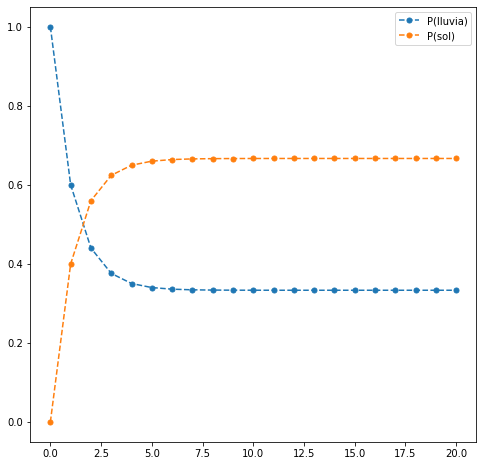

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.array((1,0))
P = np.array([[3/5, 2/5], [1/5, 4/5]])
print('Sumas de filas: ',P.sum(axis=1))
iteraciones = np.arange(20)
columns = ['P(lluvia)','P(sol)']
res = pd.DataFrame(index = iteraciones, columns=columns)
res.loc[0] = x
for ii in iteraciones:
    x = x.dot(P)
    res.loc[ii+1] = x
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
xx = res.index
for c in columns:
    yy = res[c]
    ax.plot(xx,yy,'.--',label=c,markersize=10)
ax.legend()
res.head(10)

Observación: Se puede comprobar que la convergencia, en este caso, no depende del estado inicial. 

Haremos solamente una prueba con otro estado inicial.

Sumas de filas:  [1. 1.]


,P(lluvia),P(sol)
0,0,1
1,0.2,0.8
2,0.28,0.72
3,0.312,0.688
4,0.3248,0.6752
5,0.32992,0.67008
6,0.331968,0.668032
7,0.332787,0.667213
8,0.333115,0.666885
9,0.333246,0.666754


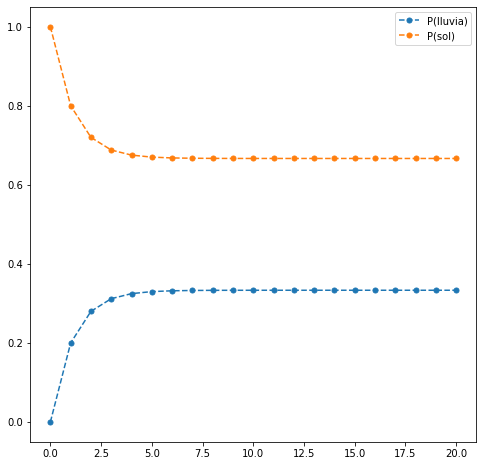

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.array((0,1))
P = np.array([[3/5, 2/5], [1/5, 4/5]])
print('Sumas de filas: ',P.sum(axis=1))
iteraciones = np.arange(20)
columns = ['P(lluvia)','P(sol)']
res = pd.DataFrame(index = iteraciones, columns=columns)
res.loc[0] = x
for ii in iteraciones:
    x = x.dot(P)
    res.loc[ii+1] = x
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
xx = res.index
for c in columns:
    yy = res[c]
    ax.plot(xx,yy,'.--',label=c,markersize=10)
ax.legend()
res.head(10)

(content:markov:ejemploestacionarianolimite)=
## Ejemplo sin límite
Veamos un caso diferente. Sea una cadena de Markov con matriz de transiciones

$$
P=\begin{pmatrix}0&1\\1&0\end{pmatrix},
$$

y vector de estados inicial $\pi^{(0)}=(1,0)$ entonces la evolución de los vectores de estados es la siguiente:

Sumas de filas:  [1 1]


,E1,E2
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


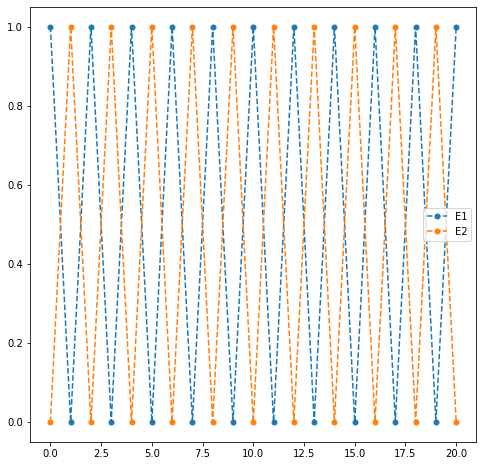

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.array((1,0))
P = np.array([[0, 1], [1, 0]])
print('Sumas de filas: ',P.sum(axis=1))
iteraciones = np.arange(20)
columns = ['E1','E2']
res = pd.DataFrame(index = iteraciones, columns=columns)
res.loc[0] = x
for ii in iteraciones:
    x = x.dot(P)
    res.loc[ii+1] = x
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
xx = res.index
for c in columns:
    yy = res[c]
    ax.plot(xx,yy,'.--',label=c,markersize=10)
ax.legend()
res.head(10)

En cambio, si empezamos desde otro vector de probabilidades inicial $\pi^{(0)}=(1/2,1/2)$

Sumas de filas:  [1 1]


,E1,E2
0,0.5,0.5
1,0.5,0.5
2,0.5,0.5
3,0.5,0.5
4,0.5,0.5
5,0.5,0.5
6,0.5,0.5
7,0.5,0.5
8,0.5,0.5
9,0.5,0.5


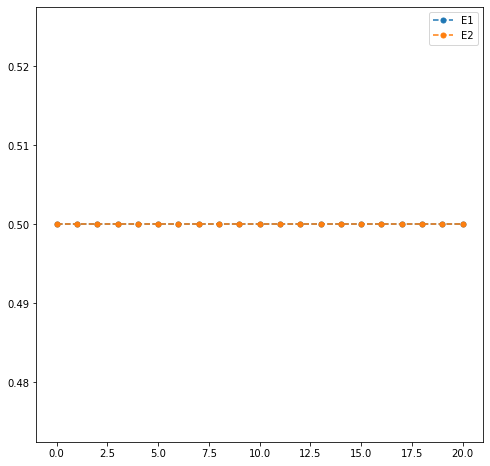

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.array((1/2,1/2))
P = np.array([[0, 1], [1, 0]])
print('Sumas de filas: ',P.sum(axis=1))
iteraciones = np.arange(20)
columns = ['E1','E2']
res = pd.DataFrame(index = iteraciones, columns=columns)
res.loc[0] = x
for ii in iteraciones:
    x = x.dot(P)
    res.loc[ii+1] = x
f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
xx = res.index
for c in columns:
    yy = res[c]
    ax.plot(xx,yy,'.--',label=c,markersize=10)
ax.legend()
res.head(10)

## Distribución asintótica

Se dice que $\lambda =(\lambda_1,\ldots,\lambda_r)$, con $\lambda_i\geq 0$ y $\sum_{i}\lambda_i=1$ es una __distribución asintótica__ de la cadena de Markov si

$$
\lambda = \lim_{n\to\infty} \pi^{(n)} = \lim_{n\to\infty}\pi^{(0)}P^n,
$$
para cualquier $\pi^{(0)}$ inicial.

Hemos visto que esta distribución no tiene por qué existir, pero cuando lo hace se puede calcular como

$$
\lambda_j=\lim_{n\to\infty}(P^n)_{ij},\quad \forall j.
$$

En otras palabras, sucede que

$$
P^n\xrightarrow[n\to\infty]{}\begin{pmatrix}\lambda_1&\cdots&\lambda_r\\
\lambda_1&\cdots&\lambda_r\\
\vdots & \ddots & \vdots\\
\lambda_1&\cdots&\lambda_r\end{pmatrix}
$$


> __Pregunta:__ ¿qué sucede en el caso de las matrices anteriores?


Caso

$$
P
=\begin{pmatrix}\frac{3}{5}&\frac{2}{5}\\\frac{1}{5}&\frac{4}{5}\end{pmatrix}
$$

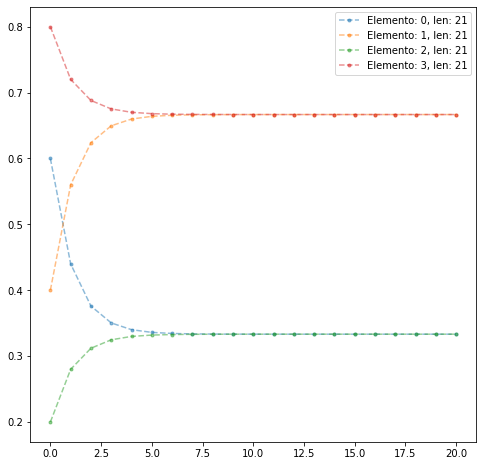

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Pt = np.array([[3/5, 2/5], [1/5, 4/5]])
P = Pt.copy()
ptt = list(P.ravel())
iteraciones = 20
for _ in np.arange(iteraciones):
    P = P.dot(Pt)
    ptt+=(list(P.ravel()))

f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
for i in np.arange(4):
    els = [xx for ii,xx in enumerate(ptt) if ii%4==i]
    plt.plot(els,'.--',label='Elemento: {}, len: {}'.format(i,len(els)),alpha=0.5)
ax.legend()

Caso

$$
P=\begin{pmatrix}0&1\\1&0\end{pmatrix}
$$

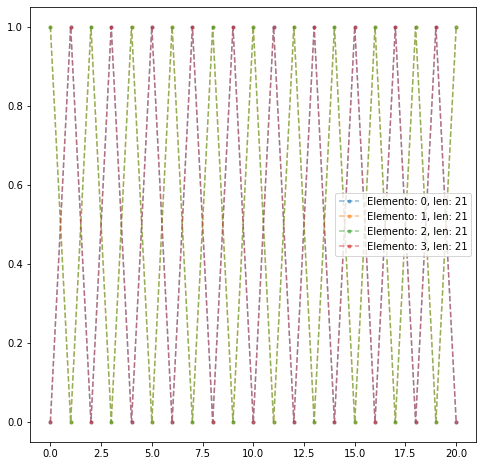

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Pt = np.array([[0, 1], [1, 0]])
P = Pt.copy()
ptt = list(P.ravel())
iteraciones = 20
for _ in np.arange(iteraciones):
    P = P.dot(Pt)
    ptt+=(list(P.ravel()))

f,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
for i in np.arange(4):
    els = [xx for ii,xx in enumerate(ptt) if ii%4==i]
    plt.plot(els,'.--',label='Elemento: {}, len: {}'.format(i,len(els)),alpha=0.5)
ax.legend()

¿Qué sucede si empezamos en la distribución límite? Es decir

$$
\pi^{(0)}=\lambda\quad \text{¿ }\pi^{(1)}\text{ ?}
$$

Escogemos cualquier $i$ y tenemos

$$
\pi^{(1)}=\lambda P=
\left(\lim_{n\to\infty}P^n_{i,\cdot}\right)P=
\left(\lim_{n\to\infty}P_{i,\cdot}^{n+1}\right)=
\lambda.
$$


## Distribución estacionaria


::::{note}
Si empezamos en la distribución límite, estaremos allí para siempre. Esto motiva la siguiente definición
::::


````{prf:definition} Distribución estacionaria

Dada una cadena de Markov con matriz de transición $P$, una __distribución estacionaria__ es una distribución de probabilidad $\pi$ que satisface

$$
\pi=\pi P \Leftrightarrow \pi_j=\sum_{i}\pi_i P_{ij},\quad \forall j.
$$

````

Si empezamos la cadena de Markov en la distribución estacionaria $\pi$, la distribución no cambiará: _estacionaria_.

Otros nombres que recibe esta distribución:
+ medida o distribución invariante
+ probabilidad o distribución de equilibrio (física)

## Relación entre distribución estacionaria y distribución límite

```{admonition} __Recordatorio__
:class: tip
Queremos conocer la distribución límite, pero es mucho más sencillo calcular la distribución estacionaria resolviendo el Sistema de Ecuaciones Lineales (SEL) anterior.
```

Las preguntas que nos podemos hacer son:

i) Existe?

ii) Es única?

iii) Cuándo la distribución de equilibrio es una distribución límite? Es decir, cuándo, partiendo de una distribución inicial $\pi^{(0)}$ cualquiera, la cadena de Markov converge a ella?

```{admonition} __Observación__
:class: tip
Hemos visto que ser una distribución límite implica ser una distribución estacionaria, pero la implicación inversa no es cierta (ver ejemplo {ref}`content:markov:ejemploestacionarianolimite`) con las distribuciones iniciales $\pi^{(0)}=(0.5, 0.5)$ y $\pi^{(0)}=(1, 0)$.
```

Queremos saber, bajo qué condiciones una distribución estacionaria será la distribución límite. Para ello necesitamos las siguientes definiciones

````{prf:definition} Matriz positiva

Decimos que una matriz $A=(a_{ij})$ es __positiva__ si $a_{ij}>0$ para todo $i,j$.
````

````{prf:definition} Matriz regular

Una matriz $P$ _estocástica_ es __regular__ si existe algún $s>0$ tal que $P^s$ es positiva, es decir

$$
(P^s)_{ij}>0,\quad \forall i,j.
$$

````

Si la matriz de transiciones de una cadena de Markov es _regular_ decimos que la cadena de Markov es _regular_.

Esto quiere decir que, para un tiempo $s$, se puede siempre llegar desde cualquier estado a cualquier otro estado de la cadena de Markov.

Entonces tenemos el siguiente teorema

````{prf:theorem} Comportamiento asintótico

Sea una cadena de Markov regular, con $|\mathcal{X}|=r<\infty$. Entonces existe una única distribución de probabilidad estacionaria $\pi=(\pi_1,\ldots,\pi_r)$ con $\pi_i>0$ para todo $i$.

Además, el vector de probabilidad a tiempo $n$, $\pi^{(n)}$ converge a $\pi$, es decir

$$
\lim_{n\to\infty}P^n_{ij}=\pi_j,\quad \forall i.
$$


````

## Cálculo de distribución estacionaria

> Ejemplo del clima

La matriz de transiciones es obviamente regular. Luego el vector de equilibrio satisface el sistema:

$$
(\pi_1\quad \pi_2)\begin{pmatrix}\frac{3}{5}&\frac{2}{5}\\\frac{1}{5}&\frac{4}{5}\end{pmatrix}=
(\pi_1\quad \pi_2)
$$

Es una ecuación de autovectores: es siempre un sistema compatible
indeterminado. Lo resolvemos eliminando una de las ecuaciones:

$$
\frac{3}{5}\pi_1+\frac{1}{5}\pi_2=\pi_1,\quad
\frac{1}{5}\pi_2=\frac{2}{5}\pi_1,\quad \pi_2=2\pi_1.$$

Hay infinitas soluciones, pero tenemos otra ecuación que podemos añadir al sistema:

$$
\pi_1+\pi_2=1,
$$

debido a que se trata de un vector de probabilidad. Por tanto:

$$
\pi=\left(\frac{1}{3},\quad \frac{2}{3}\right).
$$

